# 5. Wykorzystanie narzędzi do eksploracyjnej analizy danych (EDA)

In [24]:
import pandas as pd

df = pd.read_csv('data.csv')

# Podstawowe informacje o danych
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3058 entries, 0 to 3057
Columns: 247 entries, SbjNum to gk_weight
dtypes: float64(208), int64(18), object(21)
memory usage: 5.8+ MB
None
             SbjNum        Srvyr      Country         LANG           R1  \
count  3.058000e+03  3058.000000  3058.000000  3058.000000  3058.000000   
mean   1.333905e+08  3084.743623     2.012426     2.180510    22.521583   
std    1.256690e+05    97.219107     0.817203     2.364438    20.294923   
min    1.331715e+08  3001.000000     1.000000     1.000000     1.000000   
25%    1.332825e+08  3010.000000     1.000000     1.000000     7.000000   
50%    1.333755e+08  3026.000000     2.000000     1.000000    11.000000   
75%    1.334985e+08  3212.000000     3.000000     1.000000    49.000000   
max    1.336450e+08  3264.000000     3.000000    11.000000    54.000000   

              R1_5           R4           R5           R6           R7  ...  \
count  1016.000000  3058.000000  3058.000000  3058.000000 

## Sprawdź rozkłady danych:

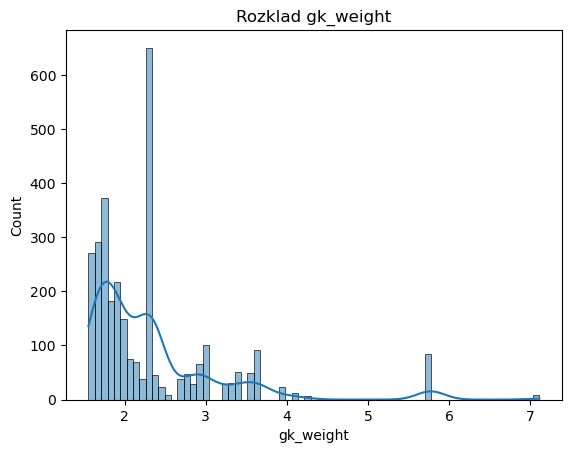

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram rozkladu cen
sns.histplot(df['gk_weight'], kde=True)
plt.title('Rozklad gk_weight')
plt.show()

## 3. Detekcja wartości odstających

In [34]:
from sklearn.ensemble import IsolationForest

mean_value = df['nigeria_weight'].mean()
df['nigeria_weight'].fillna(mean_value, inplace=True)

mean_value = df['gk_weight'].mean()
df['gk_weight'].fillna(mean_value, inplace=True)

# Dopasowanie modelu Isolation Forest
isolation_forest = IsolationForest(contamination=0.05)
df['outliers'] = isolation_forest.fit_predict(df[['gk_weight', 'nigeria_weight']])

# Wyświetlenie wartosci odstajacych
print(df[df['outliers'] == -1])

C:\Users\Hubert\AppData\Local\Temp\ipykernel_892\2651121736.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Hubert\AppData\Local\Temp\ipykernel_892\2651121736.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

         SbjNum NetDuration InterviewTimeVStart InterviewTimeVEnd  \
25    133341539     0:09:55      7/13/2020 9:15    7/13/2020 9:39   
56    133620669     0:14:33      7/23/2020 9:43    7/23/2020 9:58   
58    133282912     0:21:46      7/10/2020 9:39   7/10/2020 10:03   
74    133281835     0:08:54     7/10/2020 10:57   7/10/2020 11:09   
88    133380757     0:10:49     7/14/2020 17:39   7/14/2020 18:04   
...         ...         ...                 ...               ...   
959   133309597     0:08:45     7/11/2020 17:38   7/11/2020 17:48   
961   133282914     0:15:37     7/10/2020 11:25   7/10/2020 11:42   
967   133481272     0:08:03     7/17/2020 17:49   7/17/2020 19:01   
1001  133292785     0:15:41     7/10/2020 16:37   7/10/2020 17:03   
1011  133350222     0:18:10     7/13/2020 11:03   7/13/2020 11:24   

                 Date  Srvyr  Country  LANG  R1  R1_5  ... G11_99  \
25     7/13/2020 4:15   3232        2     6  14  37.0  ...    NaN   
56     7/23/2020 4:43   3215     

In [ ]:
import plotly.express as px

fig = px.scatter(df, x='area', y='price', color='outliers', title='Wartosci odstajace w danych')
fig.show()

## 4. Analiza głównych składowych (PCA)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Skalowanie danych
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['area', 'price', 'bedrooms']])

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Wynik PCA
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]
print(pca.explained_variance_ratio_)

In [ ]:
fig = px.scatter(df, x='PC1', y='PC2', color='price', title='Wizualizacja glownych skladowych')
fig.show()

## 4a. Wizualizacja redukcji wymiarowości - t-SNE

In [ ]:
from sklearn.manifold import TSNE

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df[['price','area','bedrooms','bathrooms','stories','parking']])

# Dodanie wynikow do ramki danych
df['tSNE1'] = tsne_results[:, 0]
df['tSNE2'] = tsne_results[:, 1]

# Wizualizacja
sns.scatterplot(data=df, x='tSNE1', y='tSNE2', hue='prefarea', palette='coolwarm')
plt.title('Wizualizacja t-SNE')
plt.show()

## 4b. Wizualizacja redukcji wymiarowości - UMAP

In [ ]:
    #!pip uninstall umap
    #!pip install umap-learn
    import umap.umap_ as umap

    # UMAP
    reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, random_state=42)
    umap_results = reducer.fit_transform(df[['price','area','bedrooms','bathrooms','stories','parking']])

    # Dodanie wynikow do ramki danych
    df['UMAP1'] = umap_results[:, 0]
    df['UMAP2'] = umap_results[:, 1]

    # Wizualizacja
    sns.scatterplot(data=df, x='UMAP1', y='UMAP2', hue='prefarea', palette='Spectral')
    plt.title('Wizualizacja UMAP')
    plt.show()

## 5. Interaktywna analiza zależności

In [ ]:
#!pip install altair
import altair as alt

chart = alt.Chart(df).mark_circle(size=60).encode(
        x='area',
        y='price',
        color='bedrooms',
        tooltip=['area', 'price', 'bedrooms']
).interactive()

chart.show()

## 5a. Analiza macierzy korelacji

In [ ]:
import numpy as np

# Macierz korelacji
correlation_matrix = df[['price','area','bedrooms','bathrooms','stories','parking']].corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

## 6. Testy statystyczne

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Model ANOVA
model = ols('price ~ C(bedrooms)', data=df).fit()
anova_results = anova_lm(model)

print(anova_results)